# PART 3. 통계분석

**목차**

1장. 데이터 샘플링
- 단순 임의 추출: train_test_split   
- 층화 임의 추출: np.random.choice   

2장. T-검정(T-Test)

- one sample: parametric vs. nonparametric
- paired sample:  parametric vs. nonparametric
- independent two sample: parametric vs. nonparametric

3장. 교차분석   
4장. 분산분석(ANOVA)   
5장. 상관분석   
6장. 회귀분석   

### 1장. 데이터 샘플링

##### 1. 단순 임의 추출
Question 1) iris 데이터로 분석을 진행하기 위해 전체 데이터의 7:3의 비율로   
training data와 test data를 추출한 뒤 새로운 변수에 저장해보자.    
(데이터 추출 방법은 단순 임의 비복원 추출을 이용한다.)

In [14]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.datasets import load_iris 
iris=load_iris()
iris_df = sns.load_dataset('iris')

In [15]:
import sklearn
from sklearn.model_selection import train_test_split

In [16]:
traindata, testdata = train_test_split(iris_df, test_size=0.3, random_state=1)

In [17]:
print(traindata.shape)
traindata.head()

(105, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
118,7.7,2.6,6.9,2.3,virginica
18,5.7,3.8,1.7,0.3,setosa
4,5.0,3.6,1.4,0.2,setosa
45,4.8,3.0,1.4,0.3,setosa
59,5.2,2.7,3.9,1.4,versicolor


In [18]:
print(testdata.shape)
testdata.head()

(45, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
14,5.8,4.0,1.2,0.2,setosa
98,5.1,2.5,3.0,1.1,versicolor
75,6.6,3.0,4.4,1.4,versicolor
16,5.4,3.9,1.3,0.4,setosa
131,7.9,3.8,6.4,2.0,virginica


##### 2. 층화 임의 추출
: class별로 sample을 나눠 뽑는 것

Question 2) iris 데이터에서 Species가 setosa인 데이터를 20개, versicolor인 데이터를 15개,    
versinica인 데이터를 15개씩 단순 임의 추출을 사용해 추출해보자.   

In [ ]:
iris_df['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

In [ ]:
setosa_idx=list(np.random.choice(50, 20))
versicolor_idx=list(np.random.choice(50, 15))
virginica_idx=list(np.random.choice(50, 15))

In [ ]:
iris_setosa=iris_df[iris_df['species']=="setosa"].loc[setosa_idx]
print(iris_setosa.shape)
iris_setosa.head()

(20, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
7,5.0,3.4,1.5,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
11,4.8,3.4,1.6,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa


In [ ]:
iris_versicolor=iris_df[iris_df['species']=="versicolor"]
iris_versicolor.reset_index(drop=True, inplace=True)
iris_versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor


In [ ]:
iris_versicolor=iris_versicolor.loc[versicolor_idx]
print(iris_versicolor.shape)
iris_versicolor.head()

(15, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
6,6.3,3.3,4.7,1.6,versicolor
45,5.7,3.0,4.2,1.2,versicolor
48,5.1,2.5,3.0,1.1,versicolor
38,5.6,3.0,4.1,1.3,versicolor
32,5.8,2.7,3.9,1.2,versicolor


In [ ]:
iris_virginica=iris_df[iris_df['species']=="virginica"]
iris_virginica.reset_index(drop=True, inplace=True)
iris_virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.3,3.3,6.0,2.5,virginica
1,5.8,2.7,5.1,1.9,virginica
2,7.1,3.0,5.9,2.1,virginica
3,6.3,2.9,5.6,1.8,virginica
4,6.5,3.0,5.8,2.2,virginica


In [ ]:
iris_virginica=iris_virginica.loc[virginica_idx]
print(iris_virginica.shape)
iris_virginica.head()

(15, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
13,5.7,2.5,5.0,2.0,virginica
43,6.8,3.2,5.9,2.3,virginica
14,5.8,2.8,5.1,2.4,virginica
44,6.7,3.3,5.7,2.5,virginica
37,6.4,3.1,5.5,1.8,virginica


### 2장. T-검정(T-Test)


#### 1절 | 일표본 T-검정(One Sample T-Test) 
 * 일표본 T-검정의 가정: 정규성

Question 3) MASS패키지의 cats 데이터는 고양이들의 성별(Sex 변수),    
몸무게(Bwt 변수), 심장의 무게(Hwt 변수)를 담고있다.    
cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지에 대한   
통계적 검정을 수행하고, 결과를 해석해보자.   

In [19]:
import pandas as pd 
cats_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\cats.csv')
cats_df.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [20]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

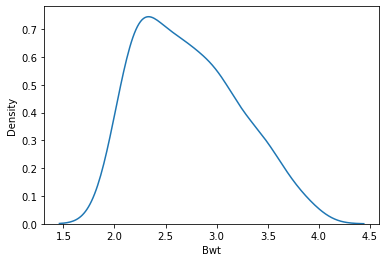

In [21]:
#1. 정규성 검정: Shapiro–Wilk test 
sns.kdeplot(data=cats_df, x="Bwt")

In [22]:
print('%.3f' %stats.shapiro(cats_df['Bwt']).pvalue)

0.000


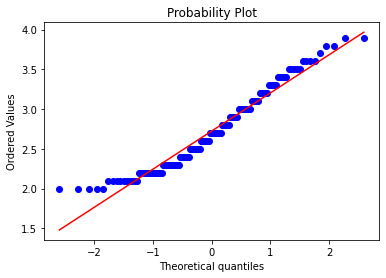

In [23]:
fig=plt.figure()
stats.probplot(cats_df['Bwt'], plot=plt)
plt.show()

결과해석: Shapiro–Wilk test 결과,    
          Bwt 변수가 normal distribution을 따르고 있다는 영가설을 기각할 확률이 p<0.001이므로, Bwt 변수는 정규분포를 따르지 않는다.           

In [25]:
#2. t-test: One sample t-test (정규성 만족할 경우)
question3_result=stats.ttest_1samp(cats_df['Bwt'], 2.6)

In [26]:
question3_result.statistic

3.0564867998078107

In [27]:
question3_result.pvalue

0.0026730362561723613

In [28]:
print("The T-statistic is %.3f and the p-value is %.3f" % question3_result)

The T-statistic is 3.056 and the p-value is 0.003


결과 해석: one-sample t-test 결과,    
고양이들의 몸무게가 2.6kg라는 영가설을 기각할 확률이 p=0.003이므로, 고양이들의 평균 몸무게는 2.6kg가 아니다. 

In [29]:
# 3. Wilcoxon Signed Rank (정규성 만족하지 않을 경우)
: null hypothesis that two related paired samples come from the same distribution
from scipy.stats import wilcoxon

In [31]:
question3_result_r=stats.wilcoxon(cats_df['Bwt']-2.6)
print("The T-statistic is %.3f and the p-value is %.3f" % question3_result)

The T-statistic is 3.056 and the p-value is 0.003


결과해석: one sample Wilcoxon Signed Rank test 결과,    
고양이들의 몸무게가 2.6kg라는 영가설을 기각할 확률이 p=0.003이므로, 고양이들의 평균 몸무게는 2.6kg가 아니다.

#### 2절 | 대응표본 T-검정(Paired Sample T-Test)

* 대응표본 T-검정의 가정: 정규성

Question 4) 10명의 환자를 대상으로 수면영양제를 복용하기 전과 후의 수면시간을 측정하여    
영양제의 효과가 있는지를 판단하고자 한다.    
영양제 복용 전과 후의 평균 수면시간에 차이가 있는지를 알아보는데,    
단측검정을 수행하여 영양제 복용 후에 수면시간이 더 늘어났는지를 검정해보자.    
수면영양제를 복용하기 전과 후의 수면시간은 아래에 제시된 바와 같다.    
(표본이 정규성을 만족한다는 가정 하에 단측검정 수행, 유의수준 = 0.05)   

In [32]:
import pandas as pd
data = pd.DataFrame({'before': [7, 3, 4, 5, 2, 1, 6, 6, 5, 4],
                     'after' :[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]})

In [37]:
# assumtion: 정규성
print('%.3f' %stats.shapiro(data['before']).pvalue)
print('%.3f' %stats.shapiro(data['after']).pvalue)

0.835
0.618


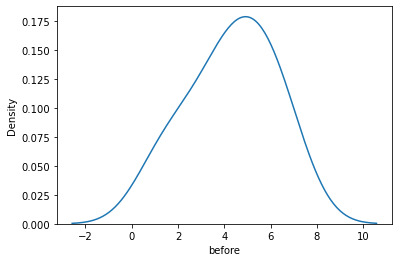

In [39]:
sns.kdeplot(data['before'])

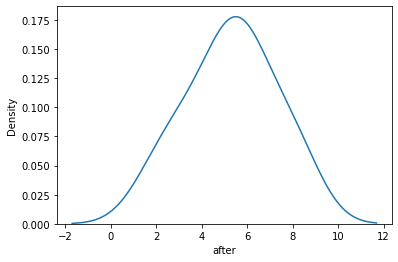

In [40]:
sns.kdeplot(data['after'])

In [3]:
from scipy import stats
question4_result=stats.ttest_rel(data['before'], data['after'])

In [33]:
print(question4_result.statistic)
print(question4_result.pvalue)

-4.743416490252569
0.0010538712570165528


In [34]:
print("The T-statistic is %.3f and the p-value is %.3f" % question4_result)

The T-statistic is -4.743 and the p-value is 0.001


결과 해석: Paired t-test 결과,   
수면 영양제 복용 전후 차이가 없다는 영가설을 기각할 확률이 p=0.001이므로, 수면영양제 복용 전후는 차이가 있다. 

#### 3절 | 독립표본 T-검정( two sample t-test)

* 독립표본 T-검정의 가정: 정규성, 독립성, 등분산성

Question 5) MASS패키지의 cats 데이터는 고양이들의 성별(Sex 변수), 몸무게(Bwt 변수),    
심장의 무게(Hwt 변수)를 담고있다. 고양이들의 성별(Sex)에 따른 몸무게(Bwt)의 평균은    
통계적으로 다르다고 할 수 있는지에 대한 검정을 수행하고, 결과를 해석해보자. 

검정을 수행하기에 앞서 설정할 수 있는 가설은 아래와 같다.
* 귀무가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 없다.
* 대립가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 있다.


In [8]:
# 가정1. 등분산성 
Levene_result=stats.levene(cats_df[cats_df['Sex']=='F']['Bwt'], cats_df[cats_df['Sex']=='M']['Bwt'])

In [9]:
print("The Statistic is %.3f and the p-value is %.3f" % Levene_result)

The Statistic is 19.431 and the p-value is 0.000


결과해석: Levene test 결과 두 data의 등분산을 가정하는 영가설을 기각하는 확률이 p<0.001이므로, 두 data는 이분산이다. 

In [43]:
# two sample t-test (등분산성, 정규성 모두 만족)
question5_result= stats.ttest_ind(cats_df[cats_df['Sex']=='F']['Bwt'], cats_df[cats_df['Sex']=='M']['Bwt'])

In [49]:
print(question5_result.statistic)
print(question5_result.pvalue)
print("The T-statistic is %.3f and the p-value is %.3f" % question5_result)

-7.330666826537409
1.590445378625505e-11
The T-statistic is -7.331 and the p-value is 0.000


In [44]:
# Welch-test (등분산성을 만족하지 않을 때)
question5_result2= stats.ttest_ind(cats_df[cats_df['Sex']=='F']['Bwt'], cats_df[cats_df['Sex']=='M']['Bwt'], equal_var=False)

In [46]:
print(question5_result2.statistic)
print(question5_result2.pvalue)
print("The T-statistic is %.3f and the p-value is %.3f" % question5_result2)

-8.70948849909559
8.831034455859356e-15
The T-statistic is -8.709 and the p-value is 0.000


결과 해석: (이분산이 가정된) Independent t-test 결과,   
성별에 따른 몸무게 차이가 없다는 영가설을 기각할 확률이 p<0.001이므로, 성별에 다른 몸무게 차이가 있다. 

In [47]:
# ranksum test (정규성도 불만족, 등분산성도 불만족)
from scipy.stats import ranksums
question5_result3=ranksums(cats_df[cats_df['Sex']=='F']['Bwt'], cats_df[cats_df['Sex']=='M']['Bwt'])

In [48]:
print(question5_result3.statistic)
print(question5_result3.pvalue)
print("The T-statistic is %.3f and the p-value is %.3f" % question5_result3)

-6.484649068728496
8.893855174450822e-11
The T-statistic is -6.485 and the p-value is 0.000


In [50]:
# Mann-Whitney test (정규성도 불만족, 등분산성도 불만족)

from scipy.stats import mannwhitneyu
question5_result4=mannwhitneyu(cats_df[cats_df['Sex']=='F']['Bwt'], cats_df[cats_df['Sex']=='M']['Bwt'])

In [51]:
print(question5_result4.statistic)
print(question5_result4.pvalue)
print("The T-statistic is %.3f and the p-value is %.3f" % question5_result4)

757.5
4.100251117160876e-11
The T-statistic is 757.500 and the p-value is 0.000


결과 해석: 등분산성이 만족이 안되었을 때 수행하는 비모수 통계 기법인   
Mann-Whitney test의 결과는 ttest의 equal_var=False option을 사용했을 때와 동일하다. 

### 3장. 교차분석


#### 2절 | 적합성 검정(goodness fo fit test)
개념: 범주형 변수에 대해 관측된 데이터의 범주별 비율이 모집단의 범주별 비율과 같은지 검증(≒one sample t-test)   
주어진 데이터가 특정 예상되는 분포와 동일한 분포를 나타내는지

영가설: 기대치의 분포는 관찰치의 분포와 차이가 없다. 

Question 6) MASS 패키지의 survey 데이터에서 W.Hnd 변수는 설문 응답자가    
왼손잡이(Left) 인지 오른손잡이(Right) 인지를 나타낸다.    
R을 이용하여 W.Hnd 변수에 대한 분할표를 생성하고, 아래와 같은 가설에 대한 적합도 검정을 수행해보자.

* 귀무가설 : 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%이다.
* 대립가설 : 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%라고 할 수 없다.

In [ ]:
import pandas as pd 
survey_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\survey.csv')
survey_df.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [ ]:
observed_q6=list(survey_df['W.Hnd'].value_counts())
observed_q6

[218, 18]

In [ ]:
expected_q6=[0.8, 0.2]

In [ ]:
question6_result=stats.chisquare(observed_q6, expected_q6)

In [ ]:
print("The Statistic is %.3f and the p-value is %.3f" % question6_result)

The Statistic is 60554.000 and the p-value is 0.000


결과 해석: 일원 카이제곱 검정 결과,    
전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%이라는 영가설을 기각할 확률이 p<0.001이므로,      
대립가설이 채택되어 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%라고 할 수 없다.

#### 3절 | 독립성 검정

개념: 동일 집단의 두 변인을 대상으로 관련성이 있는지(독립인지 아닌지) 여부를 판단하는

영가설: 변인1과 변인2는 관련성이 없다. 

Question 7) MASS 패키지의 survey 데이터에서 Exer 변수는 설문 응답자가    
얼마나 자주 운동을 하는지에 대해 Freq(자주), Some(약간), None(하지 않음)의 범주로 값을 저장하고 있다.   
W.Hnd 변수는 설문 응답자가 왼손잡이인지 오른손 잡이인지에 대해       
Left(왼손잡이), Right(오른손 잡이)의 두 가지 범주로 값을 가지고 있다.    
주로 사용하는 손과 운동의 빈도가 서로 독립인지를 확인하기 위해 분할표를 생성하고,    
아래의 가설에 대한 독립성 검정을 수행해보자.   

* 귀무가설 : W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이다.
* 대립가설 : W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이 아니다.

In [ ]:
crosstab_q7=pd.crosstab(survey_df['W.Hnd'], survey_df['Exer'])
crosstab_q7

Exer,Freq,None,Some
W.Hnd,,,
Left,7,3,8
Right,107,21,90


In [ ]:
chi_2, p, dof, expected =stats.chi2_contingency(crosstab_q7)

In [ ]:
str_format = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'

In [ ]:
print(str_format.format(chi_2, p, dof))

Test Statistic: 1.2065256705182212
p-value: 0.5470238723125773
Degree of Freedom: 2


결과 해석: 이원 카이제곱 검정 결과,   
W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이다.는 영가설을 기각할 확률이 p=0.55이므로,   
영가설이 채택되어 W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이다.

### 4장. 분산분석 (ANOVA)


#### 1절 | 일원배치 분산분석

영가설: 변수의 group간 평균 차이가 없다. 

가정: 독립성, 정규성, 등분산성

Question 8) R에 내장되어 있는 iris 데이터를 이용하여 종(Species)별로    
꽃받침의 폭(Sepal.Width)의 평균이 같은지 혹은 차이가 있는지를 확인하기 위해 일원배치 분산분석을 수행해보자.   

In [ ]:
import seaborn as sns
from sklearn.datasets import load_iris 
iris=load_iris()
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

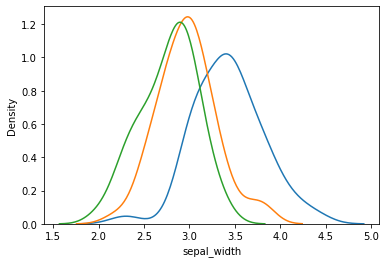

In [ ]:
sns.kdeplot(data=iris_df[iris_df['species']=='setosa'], x="sepal_width")
sns.kdeplot(data=iris_df[iris_df['species']=='virginica'], x="sepal_width")
sns.kdeplot(data=iris_df[iris_df['species']=='versicolor'], x="sepal_width")

In [ ]:
question8_result=stats.f_oneway(iris_df[iris_df['species']=='setosa']['sepal_width'], iris_df[iris_df['species']=='virginica']['sepal_width'], iris_df[iris_df['species']=='versicolor']['sepal_width'])

In [ ]:
print("The f-statistic is %.3f and the p-value is %.3f" % question8_result)

The f-statistic is 49.160 and the p-value is 0.000


결과 해석: one-way ANOVA 검정 결과,   
종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균이 같다는 영가설을 기각할 확률이 p<0.001이므로,      
영가설이 기각되어 종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균은 다르다.    

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
hsd = pairwise_tukeyhsd(iris_df['sepal_width'], iris_df['species'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,-0.658,0.001,-0.8189,-0.4971,True
setosa,virginica,-0.454,0.001,-0.6149,-0.2931,True
versicolor,virginica,0.204,0.0088,0.0431,0.3649,True


결과 해석: one-way ANOVA에 대한 사후분석으로 Tukey HSD를 수행한 결과,   
두 집단 간 비교를 수행한 모든 경우에서 유의미한 군간 차이가 나타났다. 

#### 2절 | 이원배치 분산분석

Question 9) R에 내장된 mtcars 데이터는 32개의 차종에 대한 다양한 특성과 단위 연료당 주행거리를 담고 있다.    
am변수는 변속기 종류이며, cyl변수는 실린더의 개수를 의미한다.    
데이터를 분석에 적절한 형태로 전처리한 후, 변속기 종류(am변수)와 실린더의 개수(cyl변수)에 따라    
주행거리(mpg변수) 평균에 유의미한 차이가 존재하는지 이원 분산분석을 수행하고, 그 결과를 해석해보자.

In [ ]:
import pandas as pd
mtcars_df = pd.read_csv(r"C:\ISLR-python-master\Notebooks\Data\mtcars.csv", index_col='Unnamed: 0')
mtcars_df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


* scipy 자체 함수로는 two-way ANOVA를 수행하는 함수가 없다. 

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols('mpg ~ C(am) + C(cyl) + C(am):C(cyl)', data=mtcars_df).fit()
question9_result=sm.stats.anova_lm(model, typ=2)

In [ ]:
question9_result

,sum_sq,df,F,PR(>F)
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am):C(cyl),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


In [ ]:
import decimal

In [ ]:
print(question9_result['PR(>F)'][0])
print(question9_result['PR(>F)'][1])
print(question9_result['PR(>F)'][2])

0.056083731277106835
9.354734621013796e-07
0.268614022629599


결과 해석: 이원배치 분산분석 결과,    
실린더의 종류에 따라 주행거리의 평균에 유의미한 차이를 보이지만,    
변속기 종류, 실린더와 변속기의 상호작용에 따른 주행거리의 평균 차이는 나타나지 않는다. 

Question 10) 실린더 개수(cyl변수)와 변속기 종류(am변수) 사이에 상호작용 효과가 있는지 없는지를       
시각화해주는 상호작용 그래프를 그린 후 이를 해석해보자.

In [ ]:
mtcars_df['cyl'].value_counts().sort_index()

4    11
6     7
8    14
Name: cyl, dtype: int64

In [ ]:
mtcars_df['am'].value_counts().sort_index()

0    19
1    13
Name: am, dtype: int64

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot

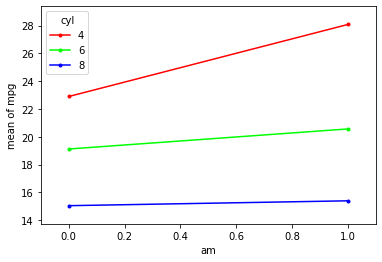

In [ ]:
interaction_plot(mtcars_df['am'], trace=mtcars_df['cyl'], response=mtcars_df['mpg'])
plt.show()

결과해석: interaction plot을 그려본 결과,    
일부 4번 실린더와 8번 실린더가 변속기 종류에 따라 주행거리가 달라지는 것 처럼 보이기도 한다.     

### 5장. 상관분석


#### 3절 | 상관계수 검정

Question 10) airquality 데이터는 뉴욕의 일일 대기 오염 정도에 대한 데이터로, 총6개의 변수로 이루어져 있다.     
6개의 변수 중 Month(월)과 Day(일)은 제외하고 Ozone(오존량), Solar.R(일사량), Wind(풍속), Temp(최고온도)만으로    
이루어진 데이터프레임 air를 생성하고, 네 가지 변수에 대한 상관계수를 산출해보자.    
단, 모든 변수값에 NA가 없는 데이터들만 이용하여 피어슨, 스피어만, 켄달 상관계수를 모두 산출하여라.

In [ ]:
import pandas as pd
airq_df = pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\airquality.csv', index_col='Unnamed: 0')
airq_df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [ ]:
air=airq_df.loc[:,:'Temp']
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 1 to 153
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 11.0 KB


In [ ]:
missing_check=pd.isnull(air)
missing_n=air.isnull().sum()
missing_n

Ozone      37
Solar.R     7
Wind        0
Temp        0
dtype: int64

In [ ]:
air = air.dropna()
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 1 to 153
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    111 non-null    float64
 1   Solar.R  111 non-null    float64
 2   Wind     111 non-null    float64
 3   Temp     111 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 4.3 KB


In [ ]:
corr_1=air.corr(method='pearson')
corr_2=air.corr(method='spearman')
corr_3=air.corr(method='kendall')

In [ ]:
corr_1

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348342,-0.612497,0.698541
Solar.R,0.348342,1.000000,-0.127183,0.294088
Wind,-0.612497,-0.127183,1.000000,-0.497190
Temp,0.698541,0.294088,-0.497190,1.000000


In [ ]:
corr_2

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.348186,-0.605136,0.772932
Solar.R,0.348186,1.000000,-0.061696,0.209537
Wind,-0.605136,-0.061696,1.000000,-0.499323
Temp,0.772932,0.209537,-0.499323,1.000000


In [ ]:
corr_3

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.240319,-0.440459,0.586147
Solar.R,0.240319,1.000000,-0.043013,0.142902
Wind,-0.440459,-0.043013,1.000000,-0.362387
Temp,0.586147,0.142902,-0.362387,1.000000


* 상관분석에 대한 significance는 scipy.stats.pearsonr()를 통해 알 수있다. 
그러나 matrix로 결과가 깔끔하게 산출되서 나오지 않음.

Question 11) air데이터 내의 네가지 변수 조합별 피어슨 상관계수를 그래프로 시각화해보자.

<AxesSubplot:>

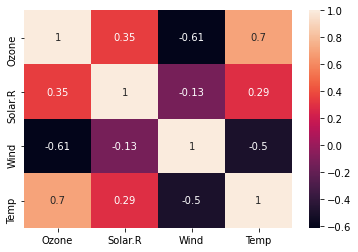

In [ ]:
sns.heatmap(corr_1, annot = True)

Question 12) air데이터의 Ozone(오존량)와 Wind(풍속)변수에 대한 상관분석을 실시하고,    
피어슨 상관계수에 대한 검정 결과를 해석해보자. 

In [ ]:
question12_result=stats.pearsonr(air['Ozone'], air['Wind'])

In [ ]:
print("The Pearson correlation coefficient is %.3f and the p-value is %.3f" % question12_result)

The Pearson correlation coefficient is -0.612 and the p-value is 0.000


결과해석: Pearson 상관분석 결과,    
    Ozone 변수와 Wind 변수의 상관계수는 -0.612로 두 변수간 음의 상관관계가 확인되었으며,    
    유의미성 검정시 p value<0.001로 통계적으로 유의미한 상관관계가 존재하는 것으로 보인다. 

### 6장. 회귀분석


#### 2절 | 단순선형회귀분석

##### 3. 단순선형회귀분석  
Question 13)  MASS패키지에서 제공하는 Cars93 데이터의 엔진크기(EngineSize)를 독립변수,    
가격(Price)를 종속변수로 설정하여 단순 선형 회귀분석을 실시한 후 추정된 회귀모형에 대해 해석해보자.


In [ ]:
import pandas as pd
cars93_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\Cars93.csv', index_col='Unnamed: 0')
cars93_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
question13_result = ols('Price ~ EngineSize', data=cars93_df).fit()

In [ ]:
question13_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     50.51
Date:                Thu, 15 Jul 2021   Prob (F-statistic):           2.59e-10
Time:                        22:27:19   Log-Likelihood:                -321.85
No. Observations:                  93   AIC:                             647.7
Df Residuals:                      91   BIC:                             652.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6692      2.239      2.085      0.040       0.222       9.117
EngineSize     5.5629      0.783      7.107      0.000       4.008       7.118
==============================================================================
Omnibus:                       54.332   Durbin-Watson:                   1.172
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.069
Skew:                           1.917   Prob(JB):                     7.31e-48
Kurtosis:                       9.428   Cond. No.                         8.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결과해석: Price를 종속변수로, Engine size를 독립변수로 설정한 단순선형회귀분석 수행결과,    
    Engine size 변수항의 p value<0.001로 해당 항의 기울기가 0이라는 영가설을 기각하여   
    engine size는 price를 예측하는 것을 알 수 있음.    
    
* <font color=blue> 회귀분석 결과를 설명할 때 기본적으로 논하는 항목이 무엇이 있는지 list up하는 것이 필요함. 

##### 4. R을 이용한 선형회귀모형 진단
Question 14) 위 예제에서 생성한 선형회귀모델 Cars93_lm을 평가할 수 있는    
다양한 그래프를 생성한 후 해석해보자. "모형진단그래프 그리기"

* R이 훨씬 쉽다. R 사용을 고려해보자. 

<AxesSubplot:xlabel='Price', ylabel='EngineSize'>

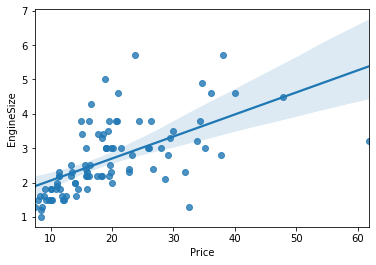

In [ ]:
# 회귀 직선

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x="Price", y="EngineSize", data=cars93_df)

<AxesSubplot:xlabel='Price', ylabel='EngineSize'>

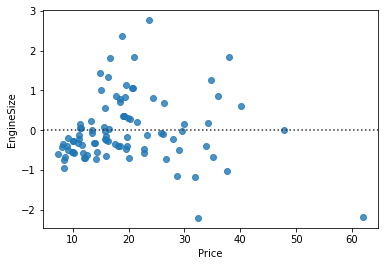

In [ ]:
#1. Residuals vs Fitted plot
sns.residplot(x="Price", y="EngineSize", data=cars93_df)

check point: Y 잔차의 평균은 0을 중심으로 일정하게 패턴 없이 분포되어 있어야 함.

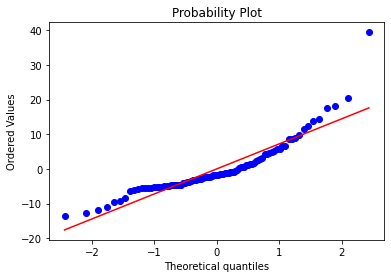

In [ ]:
#2. Normal Q-Q plot
model_residuals = question13_result.resid

from scipy import stats
res = stats.probplot(model_residuals , plot=plt)
plt.show()

check point: 잔차가 정규분포를 따르는지 확인

In [ ]:
#3. scale-location plot --> skip 개념도 모른다. 

In [ ]:
# 4. Residuals vs Leverage (Cook's distance)

C:\myeongju\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


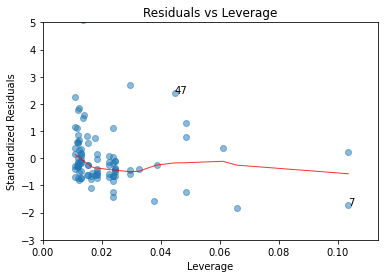

In [ ]:
model_norm_residuals = question13_result.get_influence().resid_studentized_internal
model_leverage = question13_result.get_influence().hat_matrix_diag
model_cooks = question13_result.get_influence().cooks_distance[0]


plot_leverage = plt.figure()
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_leverage.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_leverage.axes[0].set_ylim(-3, 5)
plot_leverage.axes[0].set_title('Residuals vs Leverage')
plot_leverage.axes[0].set_xlabel('Leverage')
plot_leverage.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_leverage.axes[0].annotate(i,
                                   xy=(model_leverage[i],
                                       model_norm_residuals[i]));

check point: 레버리지는 설명변수가 얼마나 극단에 치우쳐 있는지를 뜻함.    
빨간 dash line으로 Cook’s distance를 표시함. 

##### 5. 선형회귀모형을 활용한 예측
Question 14) MASS패키지에서 제공하는 Cars93 데이터의 엔진크기(EngineSize)를 독립변수,    
가격(Price)를 종속변수로 설정하여 회귀모형을 생성한 후, Cars93 데이터의 5개 행을 랜덤으로 뽑아 가격(Price)을 예측해보자.    
예측 시 predict 함수의 interval 인자값을 조정하며 그 결과를 비교해보자.   

In [ ]:
cars93_df.shape

(93, 27)

In [ ]:
cars93_df.sample(n=5)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
46,Hyundai,Scoupe,Sporty,9.1,10.0,11.0,26,34,None,Front,...,4,166,94,64,34,23.5,9.0,2285,non-USA,Hyundai Scoupe
93,Volvo,850,Midsize,24.8,26.7,28.5,20,28,Driver & Passenger,Front,...,5,184,105,69,38,30.0,15.0,3245,non-USA,Volvo 850
49,Lexus,ES300,Midsize,27.5,28.0,28.4,18,24,Driver only,Front,...,5,188,103,70,40,27.5,14.0,3510,non-USA,Lexus ES300
24,Dodge,Shadow,Small,8.4,11.3,14.2,23,29,Driver only,Front,...,5,172,97,67,38,26.5,13.0,2670,USA,Dodge Shadow
83,Suzuki,Swift,Small,7.3,8.6,10.0,39,43,None,Front,...,4,161,93,63,34,27.5,10.0,1965,non-USA,Suzuki Swift


In [ ]:
question13_result.predict(cars93_df.sample(n=5))

32    14.682481
55    18.576539
15    16.907657
85    16.907657
19    36.377948
dtype: float64

* <font color=blue> 점추정만 알뿐 구간 추정을 몰라서 일단 skip

#### 3절 | 다중선형회귀분석

##### 3. 더미변수(dummy variable)
Question 15)  R에서 회귀모형을 생성하는 lm함수는 데이터에 범주형 변수가 포함되어 있을 경우,    
이를 자동으로 더미변수로 변환하여 회귀모형을 생성한다.    
이 과정을 더 자세히 이해하기 위해 범주형 변수(Spceies)가 포함된 iris데이터에서    
Petal.Length를 종속변수로 두고 나머지 변수들을 독립변수로 설정한 회귀모형을 생성하고 그 결과를 살펴보자.   

In [ ]:
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.datasets import load_iris 
from statsmodels.formula.api import ols
iris=load_iris()
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_df.columns
iris_x=iris_df[['sepal_length', 'sepal_width', 'petal_width', 'species']]
iris_y=iris_df['petal_length']

In [ ]:
question15_result = LinearRegression().fit(iris_x, iris_y)

ValueError: could not convert string to float: 'setosa'

* factor변수를 요인변수로 만들어주지 않으면 linear regression 작동 안됨. 

In [ ]:
import pandas as pd
iris_df_dumm=pd.get_dummies(iris_df['species'])

In [ ]:
iris_x=pd.concat([iris_df[['sepal_length', 'sepal_width', 'petal_width']], iris_df_dumm], axis=1)
iris_x.head()

,sepal_length,sepal_width,petal_width,setosa,versicolor,virginica
0,5.1,3.5,0.2,1,0,0
1,4.9,3.0,0.2,1,0,0
2,4.7,3.2,0.2,1,0,0
3,4.6,3.1,0.2,1,0,0
4,5.0,3.6,0.2,1,0,0


In [ ]:
question15_result=sm.OLS(iris_y, iris_x.assign(const=1)).fit()

In [ ]:
question15_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     1317.
Date:                Sat, 17 Jul 2021   Prob (F-statistic):          2.88e-118
Time:                        15:39:05   Log-Likelihood:                -9.2833
No. Observations:                 150   AIC:                             30.57
Df Residuals:                     144   BIC:                             48.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sepal_length     0.6080      0.050     12.101      0.000       0.509       0.707
sepal_width     -0.1805      0.080     -2.246      0.026      -0.339      -0.022
petal_width      0.6022      0.121      4.959      0.000       0.362       0.842
setosa          -1.1371      0.141     -8.061      0.000      -1.416      -0.858
versicolor       0.3262      0.077      4.231      0.000       0.174       0.479
virginica        0.8371      0.140      5.960      0.000       0.559       1.115
const            0.0262      0.194      0.135      0.893      -0.357       0.410
==============================================================================
Omnibus:                        0.896   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.515
Skew:                          -0.044   Prob(JB):                        0.773
Kurtosis:                       3.273   Cond. No.                     6.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.85e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

결과해석: 해당 모형은 Petal.Length의 변량의 97.8%를 설명하며,    
    모형에 포함된 모든 독립변수는 Petal.Length를 유의미하게 예측한다. 

##### 4. R을 이용한 다중회귀분석
Question 16)  MASS패키지의 Cars93 데이터에서 엔진크기(EngineSize), RPM(RPM), 무게(Weight)를 독립변수로 설정하고    
 자동차 가격(Price)를 종속변수로 설정하여 다변량 회귀분석을 수행한 뒤 그 결과를 해석해보자.   

In [ ]:
import pandas as pd
cars93_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\Cars93.csv', index_col='Unnamed: 0')
cars93_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
cars93_df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [ ]:
cars93_x=cars93_df[['EngineSize', 'RPM', 'Weight']]
cars93_y=cars93_df['Price']

In [ ]:
question16_result=sm.OLS(cars93_y, cars93_x.assign(const=1)).fit()

In [ ]:
question16_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           6.75e-16
Time:                        15:44:50   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
const        -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

결과해석: 해당 모형은 Petal.Length의 변량의 54.7%를 설명하며,       
    모형에 포함된 모든 독립변수는 Price를 유의미하게 예측한다.    

##### 5. 최적회귀방정식의 선택

Question 17) MASS 패키지의 Cars93 데이터에서 엔진크기(EngineSize), RPM(RPM), 너비(Width),    
길이(Length)를 독립변수로 가지고, 자동차의 가격(Price)을 종속변수로 가지는 선형회귀모형을 생성해보자.    
또한 변수 선택을 위한 함수를 사용하지 않고, 직접 후진 제거법을 수행하는 R코드를 살펴보며    
변수 선택법에 대해 정확하게 이해해보자.

* 후진제거: 전체 모델로 시작해서 모든 예측변수가 통계적으로 유의미한 모델이 될 때까지,    
통계적으로 유의미하지 않는 예측 변수들을 제거해나간다. 

In [ ]:
## 1) 패키지 로드 및 다중회귀모형 생성

In [ ]:
cars93_x=cars93_df[['EngineSize', 'RPM', 'Width', 'Length']]
cars93_y=cars93_df['Price']

In [ ]:
question17_result_1=sm.OLS(cars93_y, cars93_x.assign(const=1)).fit()

In [ ]:
question17_result_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     24.10
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.76e-13
Time:                        15:51:31   Log-Likelihood:                -307.98
No. Observations:                  93   AIC:                             626.0
Df Residuals:                      88   BIC:                             638.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize     8.3806      1.446      5.797      0.000       5.508      11.254
RPM            0.0071      0.001      4.942      0.000       0.004       0.010
Width         -0.6549      0.433     -1.512      0.134      -1.516       0.206
Length         0.1367      0.088      1.549      0.125      -0.039       0.312
const        -20.1516     26.265     -0.767      0.445     -72.347      32.044
==============================================================================
Omnibus:                       58.005   Durbin-Watson:                   1.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.856
Skew:                           1.950   Prob(JB):                     1.55e-64
Kurtosis:                      10.787   Cond. No.                     1.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## 2) 유의확률이 가장 높은 변수 Width를 제거하고 회귀모형(lm_b)을 다시 생성

In [ ]:
cars93_x=cars93_df[['EngineSize', 'RPM', 'Length']]
cars93_y=cars93_df['Price']

In [ ]:
question17_result_2=sm.OLS(cars93_y, cars93_x.assign(const=1)).fit()

In [ ]:
question17_result_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     30.92
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           8.70e-14
Time:                        15:52:20   Log-Likelihood:                -309.17
No. Observations:                  93   AIC:                             626.3
Df Residuals:                      89   BIC:                             636.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize     7.1103      1.185      6.000      0.000       4.756       9.465
RPM            0.0075      0.001      5.218      0.000       0.005       0.010
Length         0.0741      0.078      0.944      0.348      -0.082       0.230
const        -52.6012     15.252     -3.449      0.001     -82.906     -22.297
==============================================================================
Omnibus:                       59.869   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.189
Skew:                           1.997   Prob(JB):                     4.01e-71
Kurtosis:                      11.229   Cond. No.                     1.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## 3) 유의확률이 가장 높은 변수 Length를 제거하고 회귀모형(lm_c)을 다시 생성

In [ ]:
cars93_x=cars93_df[['EngineSize', 'RPM']]
cars93_y=cars93_df['Price']

In [ ]:
question17_result_3=sm.OLS(cars93_y, cars93_x.assign(const=1)).fit()

In [ ]:
question17_result_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     45.99
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.74e-14
Time:                        15:53:17   Log-Likelihood:                -309.64
No. Observations:                  93   AIC:                             625.3
Df Residuals:                      90   BIC:                             632.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize     7.9131      0.825      9.590      0.000       6.274       9.552
RPM            0.0075      0.001      5.198      0.000       0.005       0.010
const        -40.9772      9.000     -4.553      0.000     -58.857     -23.097
==============================================================================
Omnibus:                       59.370   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.784
Skew:                           2.004   Prob(JB):                     6.56e-67
Kurtosis:                      10.912   Cond. No.                     6.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Question 18) MASS 패키지의 Cars93 데이터에서 엔진크기(EngineSize), 마력(Horsepower), RPM(RPM), 너비(Width),    
   길이(Length), 무게(Weight)를 독립변수로 가지고, 자동차의 가격(Price)를 종속변수로 가지는 선형회귀모형을 생성해보자.    
   그 후 step함수를 사용해 ‘후진제거법’으로 변수 선택을 수행한 후 결과를 해석해보자.   

In [ ]:
cars93_x=cars93_df[['EngineSize', 'Horsepower', 'RPM', 'Width', 'Length', 'Weight']]
cars93_y=cars93_df['Price']

In [ ]:
question18=sm.OLS(cars93_y, cars93_x.assign(const=1)).fit()

In [ ]:
question18.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     33.83
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.15e-20
Time:                        16:20:39   Log-Likelihood:                -286.01
No. Observations:                  93   AIC:                             586.0
Df Residuals:                      86   BIC:                             603.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EngineSize     0.4058      1.699      0.239      0.812      -2.972       3.784
Horsepower     0.1416      0.029      4.926      0.000       0.084       0.199
RPM           -0.0016      0.002     -0.815      0.418      -0.005       0.002
Width         -1.7150      0.386     -4.438      0.000      -2.483      -0.947
Length         0.1528      0.076      2.006      0.048       0.001       0.304
Weight         0.0066      0.002      2.657      0.009       0.002       0.012
const         77.1174     24.958      3.090      0.003      27.503     126.732
==============================================================================
Omnibus:                       49.115   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.587
Skew:                           1.526   Prob(JB):                     1.06e-59
Kurtosis:                      10.796   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
question18_model = LinearRegression()

In [ ]:
import sklearn
from mlxtend.feature_selection import SequentialFeatureSelector

In [ ]:
!pip install mlxtend  

In [ ]:
bfs=SequentialFeatureSelector(question18_model, k_features='best', forward=False)

In [ ]:
bfs.fit(cars93_x, cars93_y, custom_feature_names=cars93_x.columns)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features='best')

In [ ]:
features_b=list(bfs.k_feature_names_)
features_b

['Horsepower', 'Width', 'Length', 'Weight']

### --------------------------------------------------------------------------

### 실전 예제1) ADP 실기 모의고사 1회



Q1) FIFA데이터에서 각 선수의 키는 Heghit변수에 피트와 인치로 입력되어 있습니다.    
이를 cm로 변환하여 새로운 변수 Height_cm을 생성하시오.    
( “ ' ” 앞의 숫자는 피트이며, “ ' ” 뒤의 숫자는 인치, 1피트 = 30cm, 1인치 = 2.5cm)   

In [96]:
import pandas as pd
fifa_df=pd.read_csv(r'C:\ISLR-python-master\Notebooks\Data\FIFA.csv', encoding='cp949')
fifa_df.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355


In [97]:
missing_n=fifa_df.isnull().sum()
missing_n

ID                      0
Name                    0
Age                     0
Nationality             0
Overall                 0
Club                    0
Preferred_Foot          0
Work_Rate               0
Position                0
Jersey_Number           0
Contract_Valid_Until    0
Height                  0
Weight_lb               0
Release_Clause          0
Value                   0
Wage                    0
dtype: int64

In [98]:
fifa_df['Height'][0] # 5 feet 30 inch

"5'7"

In [99]:
int(fifa_df['Height'][0][0])*30

150

In [100]:
int(fifa_df['Height'][0][2])*2.5

17.5

In [101]:
fifa_df['Height_cm']=0
for i in range(fifa_df.shape[0]):
    fifa_df['Height_cm'][i]=int(fifa_df['Height'][i][0])*30 + int(fifa_df['Height'][i][2])*2.5

<ipython-input-101-a0face242e69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df['Height_cm'][i]=int(fifa_df['Height'][i][0])*30 + int(fifa_df['Height'][i][2])*2.5


In [102]:
fifa_df.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,152


Q2) 포지션을 의미하는 Position변수를 아래 표를 참고하여 “Forward”, “Midfielder”,    
Defender”, “GoalKeeper”로 재범주화하고, factor형으로 변환하여 Position_Class 
라는 변수를 생성하고 저장하시오.

In [103]:
fifa_df['Position'].value_counts()

ST     1924
GK     1900
CB     1646
CM     1276
LB     1223
RB     1199
RM     1022
LM     1012
CAM     876
CDM     873
RCB     615
LCB     595
RCM     355
LCM     353
LW      338
RW      325
RDM     228
LDM     224
LS      184
RS      179
RWB      84
LWB      76
CF       66
RAM      21
LAM      20
LF       15
RF       13
Name: Position, dtype: int64

In [104]:
Forward=['LS, ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
Midfielder=['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM']
Defender=['LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
GoalKeeper=['GK']

In [105]:
fifa_df['Position_Class']=0
for i in range(fifa_df.shape[0]):
    if fifa_df['Position'][i] in Forward:
        fifa_df['Position_Class'][i]='Forward'
    elif fifa_df['Position'][i] in Midfielder:
        fifa_df['Position_Class'][i]='Midfielder'
    elif fifa_df['Position'][i] in Defender:
        fifa_df['Position_Class'][i]='Defender'
    else:
        fifa_df['Position_Class'][i]='GoalKeeper'

<ipython-input-105-de0505f65dd9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df['Position_Class'][i]='Forward'
C:\Users\myeon\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-105-de0505f65dd9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_df['Position_Class'][i]='GoalKeeper'
<ipython-input-105-de0505f65dd9>

In [106]:
fifa_df.head()

,ID,Name,Age,Nationality,Overall,Club,Preferred_Foot,Work_Rate,Position,Jersey_Number,Contract_Valid_Until,Height,Weight_lb,Release_Clause,Value,Wage,Height_cm,Position_Class
0,158023,L. Messi,31,Argentina,94,FC Barcelona,Left,Medium/ Medium,RF,10,2021,5'7,159,226500,110500,565,167,Forward
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,Right,High/ Low,ST,7,2022,6'2,183,127100,77000,405,185,GoalKeeper
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,Right,High/ Medium,LW,10,2022,5'9,150,228100,118500,290,172,Forward
3,193080,De Gea,27,Spain,91,Manchester United,Right,Medium/ Medium,GK,1,2020,6'4,168,138600,72000,260,190,GoalKeeper
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,Right,High/ High,RCM,7,2023,5'11,154,196400,102000,355,152,Midfielder


In [107]:
fifa_df['Position_Class'].value_counts()

Defender      6763
Midfielder    4935
GoalKeeper    4008
Forward        936
Name: Position_Class, dtype: int64

In [111]:
fifa_df['Position_Class'].dtype

dtype('O')

In [114]:
fifa_df['Position_Class']=fifa_df['Position_Class'].astype('category')

In [115]:
fifa_df['Position_Class'].dtype

CategoricalDtype(categories=['Defender', 'Forward', 'GoalKeeper', 'Midfielder'], ordered=False)

In [116]:
## 정수형은 .astype(‘int’)
## 문자형은 .astype(‘str’)
## 범주형은 .astype(‘category’)

Q3) 새로 생성한 Position_Class 변수의 각 범주에 따른 Value(선수의 시장가치)의    
평균값의 차이를 비교하는 일원배치 분산분석을 수행하고 결과를 해석하시오.    
그리고 평균값의 차이가 통계적으로 유의하다면 사후검정을 수행하고 설명하시오.   

In [141]:
fifa_df['Value'].groupby(fifa_df['Position_Class']).mean()

Position_Class
Defender      2104.653260
Forward       4095.117521
GoalKeeper    2105.888224
Midfielder    2865.531915
Name: Value, dtype: float64

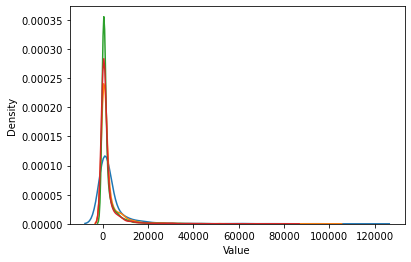

In [117]:
import seaborn as sns
sns.kdeplot(data=fifa_df[fifa_df['Position_Class']=='Forward'], x="Value")
sns.kdeplot(data=fifa_df[fifa_df['Position_Class']=='Midfielder'], x="Value")
sns.kdeplot(data=fifa_df[fifa_df['Position_Class']=='Defender'], x="Value")
sns.kdeplot(data=fifa_df[fifa_df['Position_Class']=='GoalKeeper'], x="Value")

plot 해보면 이렇지만 집단별 sample 수가 30명이 넘기 때문에 모수적 통계방법을 적용할 수 있다.

In [126]:
fifa_df['Position_Class'].value_counts()

Defender      6763
Midfielder    4935
GoalKeeper    4008
Forward        936
Name: Position_Class, dtype: int64

In [137]:
anova_result=stats.f_oneway(fifa_df[fifa_df['Position_Class']=='Forward']['Value'], 
                            fifa_df[fifa_df['Position_Class']=='Midfielder']['Value'], 
                            fifa_df[fifa_df['Position_Class']=='Defender']['Value'], 
                            fifa_df[fifa_df['Position_Class']=='GoalKeeper']['Value'])

In [136]:
print("The f-statistic is %.3f and the p-value is %.3f" % anova_result)

The f-statistic is 47.922 and the p-value is 0.000


In [139]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [140]:
hsd = pairwise_tukeyhsd(fifa_df['Value'], fifa_df['Position_Class'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Defender,Forward,1990.4643,0.001,1480.0224,2500.9061,True
Defender,GoalKeeper,1.235,0.9,-290.5287,292.9986,False
Defender,Midfielder,760.8787,0.001,486.8606,1034.8967,True
Forward,GoalKeeper,-1989.2293,0.001,-2520.5713,-1457.8873,True
Forward,Midfielder,-1229.5856,0.001,-1751.3942,-707.777,True
GoalKeeper,Midfielder,759.6437,0.001,448.4213,1070.8661,True


one-way ANOVA 검정 결과,   
Position class별로 Value의 평균이 같다는 영가설을 기각할 확률이 p<0.001이므로,   
영가설이 기각되어 Position class별로 Value의 평균은 다르다.   

사후검증을 위하여 tukeyhsd를 수행한 결과,   
Defender와 GoalKeeper 간 비교를 제외하고 나머지 모든 집단 간 비교는 서로 유의미한 차이를 보였다. 

Q4) Preferred Foot(주로 사용하는 발)과 Position_Class(재범주화 된 포지션)변수에    
따라 Value(이적료)의 차이가 있는지를 알아보기 위해 이원배치분산분석을 수행하고 결과를 해석하시오.   

In [148]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Value ~ Preferred_Foot +  Position_Class +  Preferred_Foot:Position_Class', data=fifa_df).fit()
twoway_result=sm.stats.anova_lm(model, typ=2)

In [149]:
twoway_result

,sum_sq,df,F,PR(>F)
Preferred_Foot,1.179544e+08,1.0,3.637065,5.652368e-02
Position_Class,4.637437e+09,3.0,47.664350,1.155899e-30
Preferred_Foot:Position_Class,3.700280e+08,3.0,3.803209,9.721094e-03
Residual,5.394606e+11,16634.0,NaN,NaN


In [152]:
print('%.3f' %twoway_result['PR(>F)'][0])
print('%.3f' %twoway_result['PR(>F)'][1])
print('%.3f' %twoway_result['PR(>F)'][2])

0.057
0.000
0.010


In [156]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(fifa_df['Preferred_Foot'])
fifa_df['Preferred_Foot_encoded'] = encoder.transform(fifa_df['Preferred_Foot'])

In [160]:
encoder.fit(fifa_df['Position_Class'])
fifa_df['Position_Class_encoded'] = encoder.transform(fifa_df['Position_Class'])

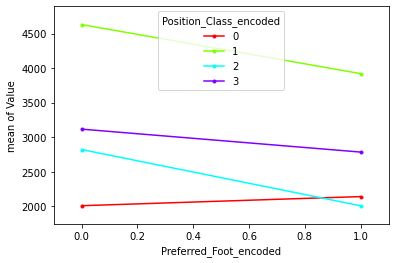

In [163]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(fifa_df['Preferred_Foot_encoded'], trace=fifa_df['Position_Class_encoded'], response=fifa_df['Value'])
plt.show()

two-way ANOVA 분석 결과,    
Prefered_foot의 p value는 0.057로 Prefered_foot에 따라 Value에 차이를 보이지 않는 것을 알 수 있다. 즉, Prefered_foot 주효과는 없다.    
Postition_Class의 p value는 0.001미만으로 Position_Class에 따라 Value에 차이가 나타나는 것을 알 수있다. 즉, Preferend foot의 주효과가 나타난다.   
Prefered_foot과 Position_Class의 상호작용향을 살펴보면 p value가 0.001로 두 변수에 상호작용이 나타나는 것을 알 수 있다.    
이를 해석하자면, 선호하는 발이 선수의 시장 가치에 미치는 영향이 선수의 position에 따라 다르게 나타남을 의미한다.    

Q5) Age, Overall, Wage, Height_cm, Weight_lb 가 Value에 영향을 미치는지    
알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오. 

In [165]:
fifa_df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Preferred_Foot',
       'Work_Rate', 'Position', 'Jersey_Number', 'Contract_Valid_Until',
       'Height', 'Weight_lb', 'Release_Clause', 'Value', 'Wage', 'Height_cm',
       'Position_Class', 'Preferred_Foot_encoded', 'Position_Class_encoded'],
      dtype='object')

In [167]:
fifa_x=fifa_df[['Age', 'Overall', 'Wage', 'Height_cm', 'Weight_lb']]
fifa_y=fifa_df['Value']

In [181]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()

python에서는 단계적 변수 선택법이 없음. 그래서 forward, backward를 모두 하기로 마음에 먹음.

In [182]:
from mlxtend.feature_selection import SequentialFeatureSelector
ffs=SequentialFeatureSelector(model, k_features='best', forward=True)
bfs=SequentialFeatureSelector(model, k_features='best', forward=False)
ffs.fit(fifa_x, fifa_y, custom_feature_names=fifa_x.columns)
bfs.fit(fifa_x, fifa_y, custom_feature_names=fifa_x.columns)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features='best')

In [183]:
features_f=list(ffs.k_feature_names_)
features_f

['Wage']

In [184]:
features_b=list(bfs.k_feature_names_)
features_b

['Wage']

In [185]:
model_full=sm.OLS(fifa_y, fifa_x.assign(const=1)).fit()
model_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 1.258e+04
Date:                Sat, 28 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:14:01   Log-Likelihood:            -1.5458e+05
No. Observations:               16642   AIC:                         3.092e+05
Df Residuals:                   16636   BIC:                         3.092e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age         -200.9108      5.013    -40.079      0.000    -210.737    -191.085
Overall      241.8456      4.006     60.372      0.000     233.994     249.698
Wage         184.1616      1.128    163.297      0.000     181.951     186.372
Height_cm     -1.2133      1.740     -0.697      0.486      -4.624       2.197
Weight_lb     -3.0891      1.543     -2.002      0.045      -6.114      -0.065
const      -9540.2766    347.951    -27.418      0.000   -1.02e+04   -8858.256
==============================================================================
Omnibus:                    17086.231   Durbin-Watson:                   1.408
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3524476.817
Skew:                           4.664   Prob(JB):                         0.00
Kurtosis:                      73.681   Cond. No.                     4.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
model_selected=sm.OLS(fifa_y, fifa_x['Wage']).fit()
model_selected.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Value   R-squared (uncentered):                   0.780
Model:                            OLS   Adj. R-squared (uncentered):              0.780
Method:                 Least Squares   F-statistic:                          5.895e+04
Date:                Sat, 28 Aug 2021   Prob (F-statistic):                        0.00
Time:                        16:14:57   Log-Likelihood:                     -1.5640e+05
No. Observations:               16642   AIC:                                  3.128e+05
Df Residuals:                   16641   BIC:                                  3.128e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wage         226.4959      0.933    242.798      0.000     224.667     228.324
==============================================================================
Omnibus:                    14529.801   Durbin-Watson:                   1.554
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1929225.025
Skew:                           3.629   Prob(JB):                         0.00
Kurtosis:                      55.245   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""